# **Define the distribution**

The distribution of $X$ is a Laplace distribution characterized by its mean and scale parameter $\sigma_X$, while $Z$ follows a Gaussian distribution with mean 0 and variance $\sigma_Z^2$.

**Laplace Distribution for $X$**

The pdf of a Laplace distribution is given by:

$$f_X(x) = \frac{1}{2\sigma_X} \exp\left(-\frac{|x|}{\sigma_X}\right)$$

For our problem, $\sigma_X=1$, simplifying the expression to:

$$f_X(x) = \frac{1}{2} \exp(-|x|)$$

**Gaussian Distribution for $Z$**

The pdf of a Gaussian (Normal) distribution is:

$$f_Z(z) = \frac{1}{\sqrt{2\pi\sigma_Z^2}} \exp\left(-\frac{z^2}{2\sigma_Z^2}\right)$$

where $\sigma_Z^2=0.1$

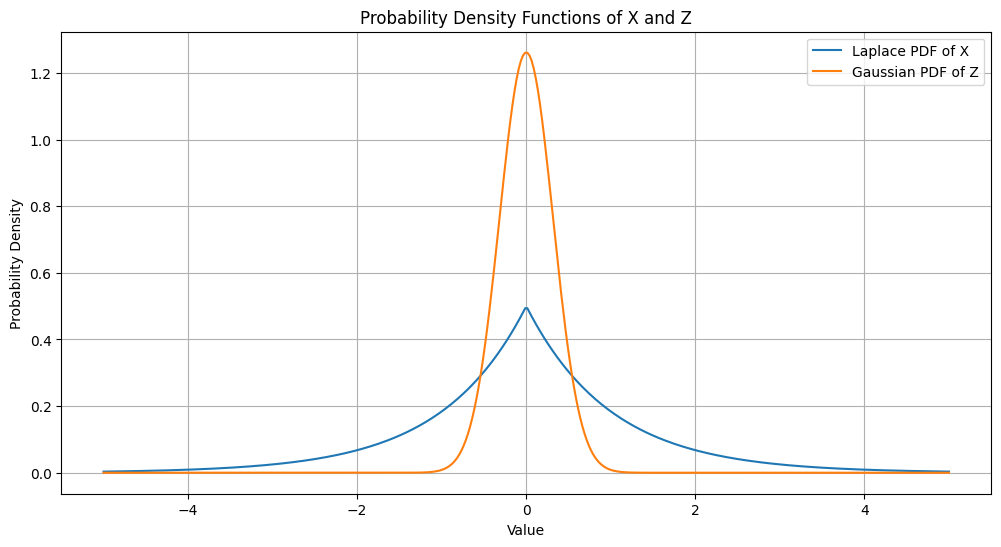

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Laplace distribution for X
def laplace_pdf(x, sigma_X=1):
    return (1 / (2 * sigma_X)) * np.exp(-np.abs(x) / sigma_X)

# Gaussian distribution for Z
def gaussian_pdf(z, sigma_Z=np.sqrt(0.1)):
    return (1 / (np.sqrt(2 * np.pi) * sigma_Z)) * np.exp(-(z**2) / (2 * sigma_Z**2))

# Plotting the distributions
x_values = np.linspace(-5, 5, 400)
z_values = np.linspace(-5, 5, 400)

plt.figure(figsize=(12, 6))
plt.plot(x_values, laplace_pdf(x_values), label='Laplace PDF of X')
plt.plot(z_values, gaussian_pdf(z_values), label='Gaussian PDF of Z')
plt.title('Probability Density Functions of X and Z')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

**Observation:**
The Laplace distribution for
X is centered at 0 with a peak at this point, reflecting its higher probability for values close to the mean. In contrast, the Gaussian distribution for
Z is also centered at 0 but with a different shape, indicating a normal distribution of noise around the mean

# **Bayesian Framework for MMSE Estimation**

The MMSE estimator seeks to minimize the average squared difference between the estimated signal and the actual signal. It leverages the probability distributions of $X$, $Z$, and $Y$ to make an educated guess about the true value of $X$ given an observation $Y$.

In a Bayesian context, we express our estimate $\hat{x}(y)$ of $X$ given $Y=y$ as the expected value of $X$ conditioned on $Y=y$, mathematically represented as:

$$\hat{x}(y) = E[X | Y=y]$$

This expectation can be computed using the posterior distribution $f_{X|Y}(x|y)$, which itself is derived using Bayes' theorem:

$$f_{X|Y}(x|y) = \frac{f_{Y|X}(y|x)f_X(x)}{f_Y(y)}$$


The likelihood $f_{Y|X}(y|x)$ represents the probability of observing $Y=y$ given a certain $X=x$, which, due to our noise model, is equivalent to the distribution of $Z=Y-X$. Since $Z$ follows a Gaussian distribution with mean 0 and variance $\sigma_Z^2$, the likelihood function is:

$$f_{Y|X}(y|x) = \frac{1}{\sqrt{2\pi\sigma_Z^2}} \exp\left(-\frac{(y-x)^2}{2\sigma_Z^2}\right)$$

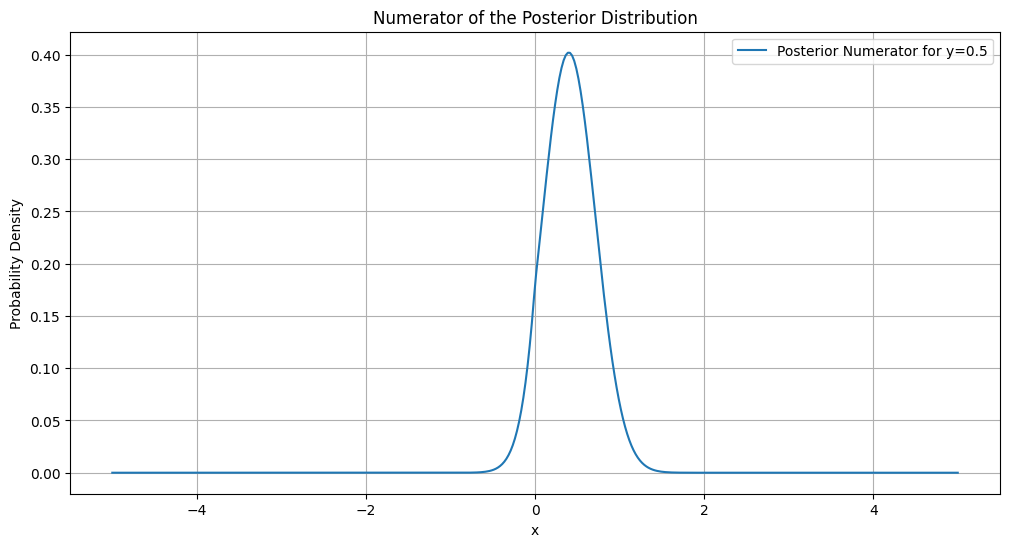

In [5]:
# Given values
sigma_X = 1
sigma_Z = np.sqrt(0.1)

# Likelihood function f_Y|X(y|x)
def likelihood(y, x, sigma_Z=sigma_Z):
    return (1 / (np.sqrt(2 * np.pi) * sigma_Z)) * np.exp(-(y - x)**2 / (2 * sigma_Z**2))

# Prior distribution f_X(x)
def prior(x, sigma_X=sigma_X):
    return laplace_pdf(x, sigma_X)

# We cannot directly plot the posterior without knowing f_Y(y),
# but we can compute the numerator of the Bayes' theorem
def posterior_numerator(y, x):
    return likelihood(y, x) * prior(x)

# Example plot of the numerator for a given y value
y_example = 0.5
x_values = np.linspace(-5, 5, 400)

# Computing the numerator of the posterior for visualization
posterior_values = [posterior_numerator(y_example, x) for x in x_values]

plt.figure(figsize=(12, 6))
plt.plot(x_values, posterior_values, label=f'Posterior Numerator for y={y_example}')
plt.title('Numerator of the Posterior Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

This code plots the numerator of the posterior distribution for a specific value of $y$. It's important to note that to fully utilize the posterior for MMSE estimation, we would need to normalize this by $f_Y(y)$, the marginal likelihood. The plot demonstrates how the likelihood of different $x$ values changes given an observation $y$, reflecting the influence of both the prior and the likelihood on our belief about $x$.

# **Compute the MMSE Estimator**

To compute the MMSE estimator $\hat{x}(y)$ of $X$ given $Y=y$, we need to calculate the expectation of $X$ given $Y=y$. This expectation is the weighted average of all possible values of $x$, weighted by their posterior probabilities given $y$, which can be mathematically expressed as:

$$\hat{x}(y) = \int x f_{X|Y}(x|y) \, dx$$

Since we do not have a closed-form expression for $f_Y(y)$, the denominator in the expression for $f_{X|Y}(x|y)$, we will compute the MMSE estimator by numerically integrating the numerator of the posterior distribution over $x$ and then normalizing it. This approach avoids the direct computation of $f_Y(y)$.

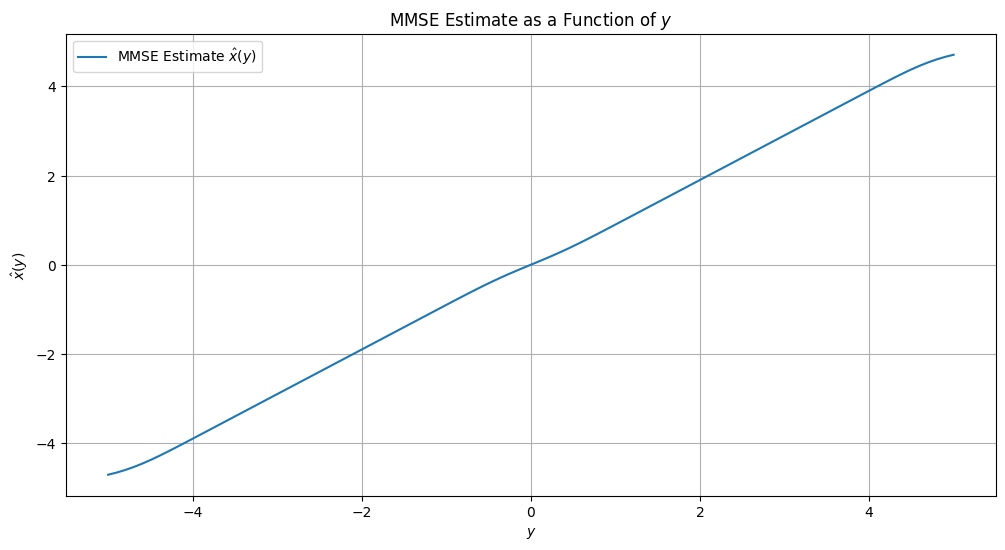

In [7]:
from scipy.integrate import quad

# Function to compute the MMSE estimate for a given y
def mmse_estimate(y, x_values):
    # Numerator of the expectation: integral of x*f_{X|Y}(x|y) over x
    numerator_integral = quad(lambda x: x * posterior_numerator(y, x), min(x_values), max(x_values))[0]

    # Normalization factor: integral of f_{X|Y}(x|y) over x (same as the denominator of Bayes' theorem)
    denominator_integral = quad(lambda x: posterior_numerator(y, x), min(x_values), max(x_values))[0]

    # MMSE estimate is the ratio of the two integrals
    return numerator_integral / denominator_integral

# Compute MMSE estimates for a range of y values
y_values = np.linspace(-5, 5, 100)
mmse_estimates = [mmse_estimate(y, x_values) for y in y_values]

# Plotting the MMSE estimate as a function of y
plt.figure(figsize=(12, 6))
plt.plot(y_values, mmse_estimates, label='MMSE Estimate $\hat{x}(y)$')
plt.title('MMSE Estimate as a Function of $y$')
plt.xlabel('$y$')
plt.ylabel('$\hat{x}(y)$')
plt.legend()
plt.grid(True)
plt.show()